## Preparation Step

## Import Library and Data Preparation

In [1]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Load Dataset

In [2]:
# Import Dataset i use Kaggle Dataset and already upload it into my github repository 
url = 'https://raw.githubusercontent.com/Revlizn/Dataset_project_capstone_IL/main/Data_Tanaman_Padi_Sumatera_version_1.csv'
df1 = pd.read_csv(url, encoding="UTF-8")

In [3]:
#Accessing a list of columns from a dataframe
df1.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [4]:
print(df1)

    Provinsi  Tahun    Produksi  Luas Panen  Curah hujan  Kelembapan  \
0       Aceh   1993  1329536.00   323589.00       1627.0       82.00   
1       Aceh   1994  1299699.00   329041.00       1521.0       82.12   
2       Aceh   1995  1382905.00   339253.00       1476.0       82.72   
3       Aceh   1996  1419128.00   348223.00       1557.0       83.00   
4       Aceh   1997  1368074.00   337561.00       1339.0       82.46   
..       ...    ...         ...         ...          ...         ...   
219  Lampung   2016  3831923.00   390799.00       2317.6       79.40   
220  Lampung   2017  4090654.00   396559.00       1825.1       77.04   
221  Lampung   2018  2488641.91   511940.93       1385.8       76.05   
222  Lampung   2019  2164089.33   464103.42       1706.4       78.03   
223  Lampung   2020  2604913.29   545149.05       2211.3       75.80   

     Suhu rata-rata  
0             26.06  
1             26.92  
2             26.27  
3             26.08  
4             26.31  
.. 

In [5]:
#Displays the initial 5 rows
df1.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [6]:
#check row and column
df1.shape

(224, 7)

In [7]:
#Displays information regarding the structure and characteristics of a DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


## Exploratory Data Analysis

In [8]:
#Displays the null values contained in each DataFrame column
df1.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [9]:
#overview statistics descriptive
df1.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


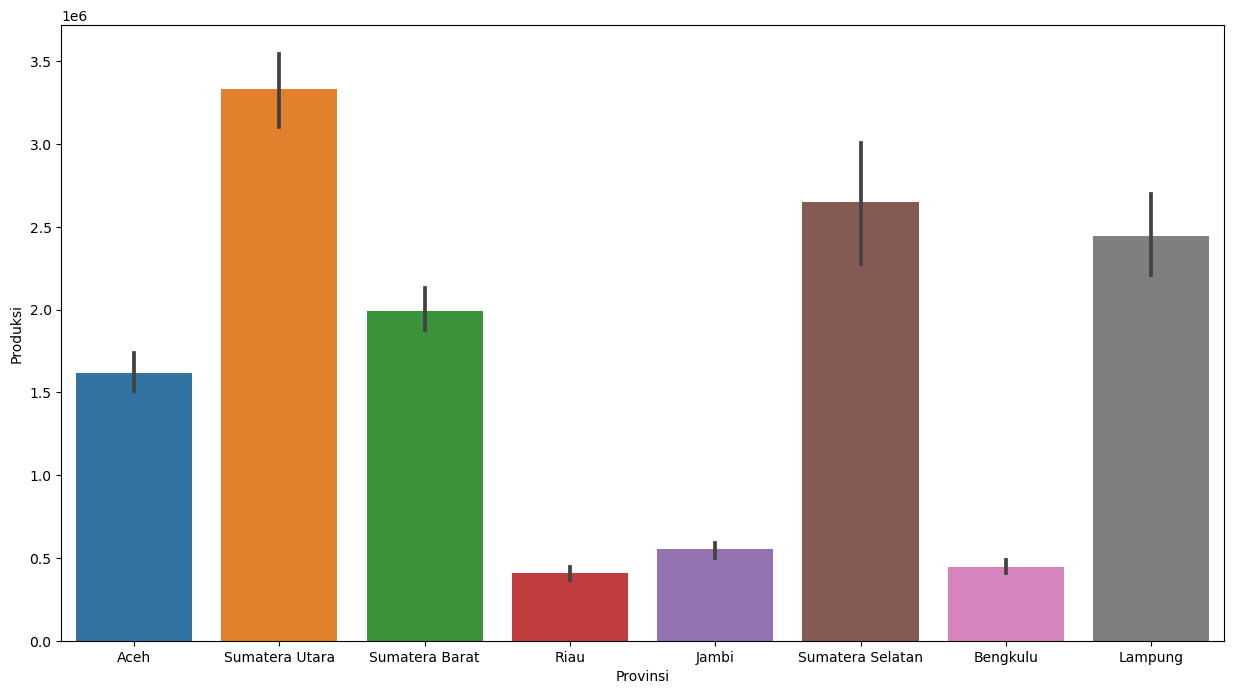

In [10]:
#Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Provinsi', y='Produksi', data=df1)
plt.show()

In [11]:
#Create a Pivot table
pd.pivot_table(df1,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


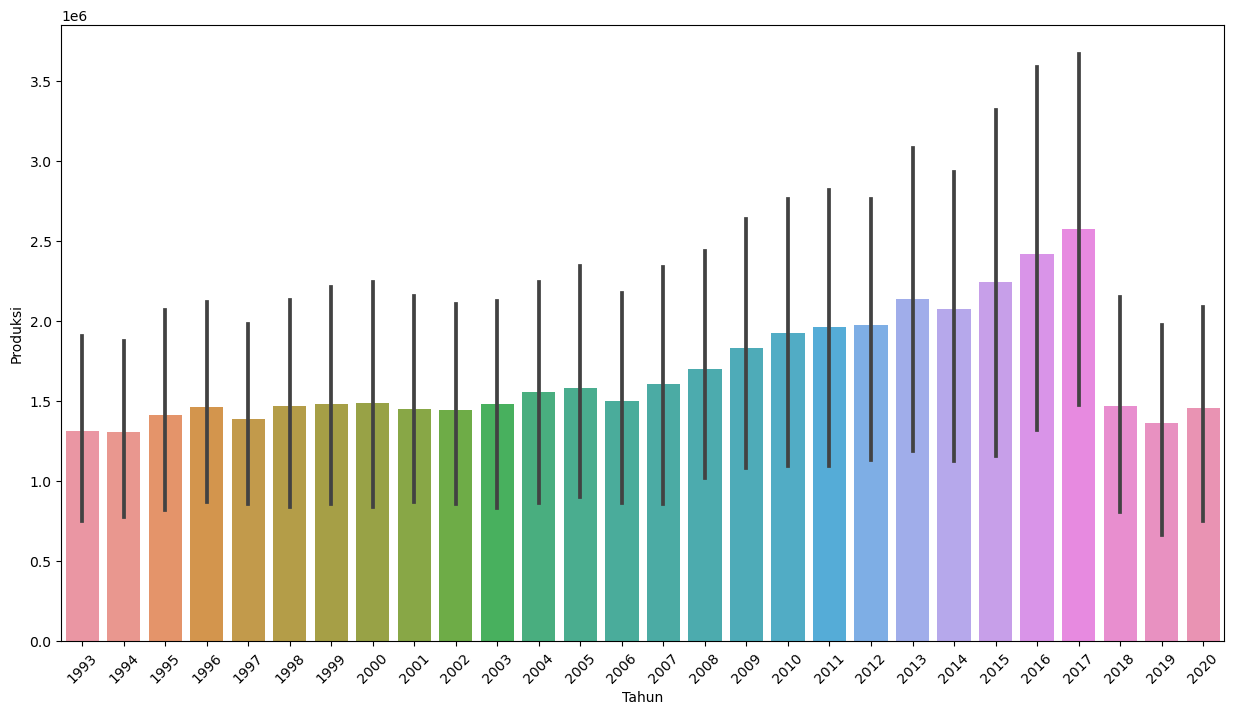

In [12]:
#Create bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Tahun', y='Produksi', data=df1)
plt.xticks(rotation=45)
plt.show()

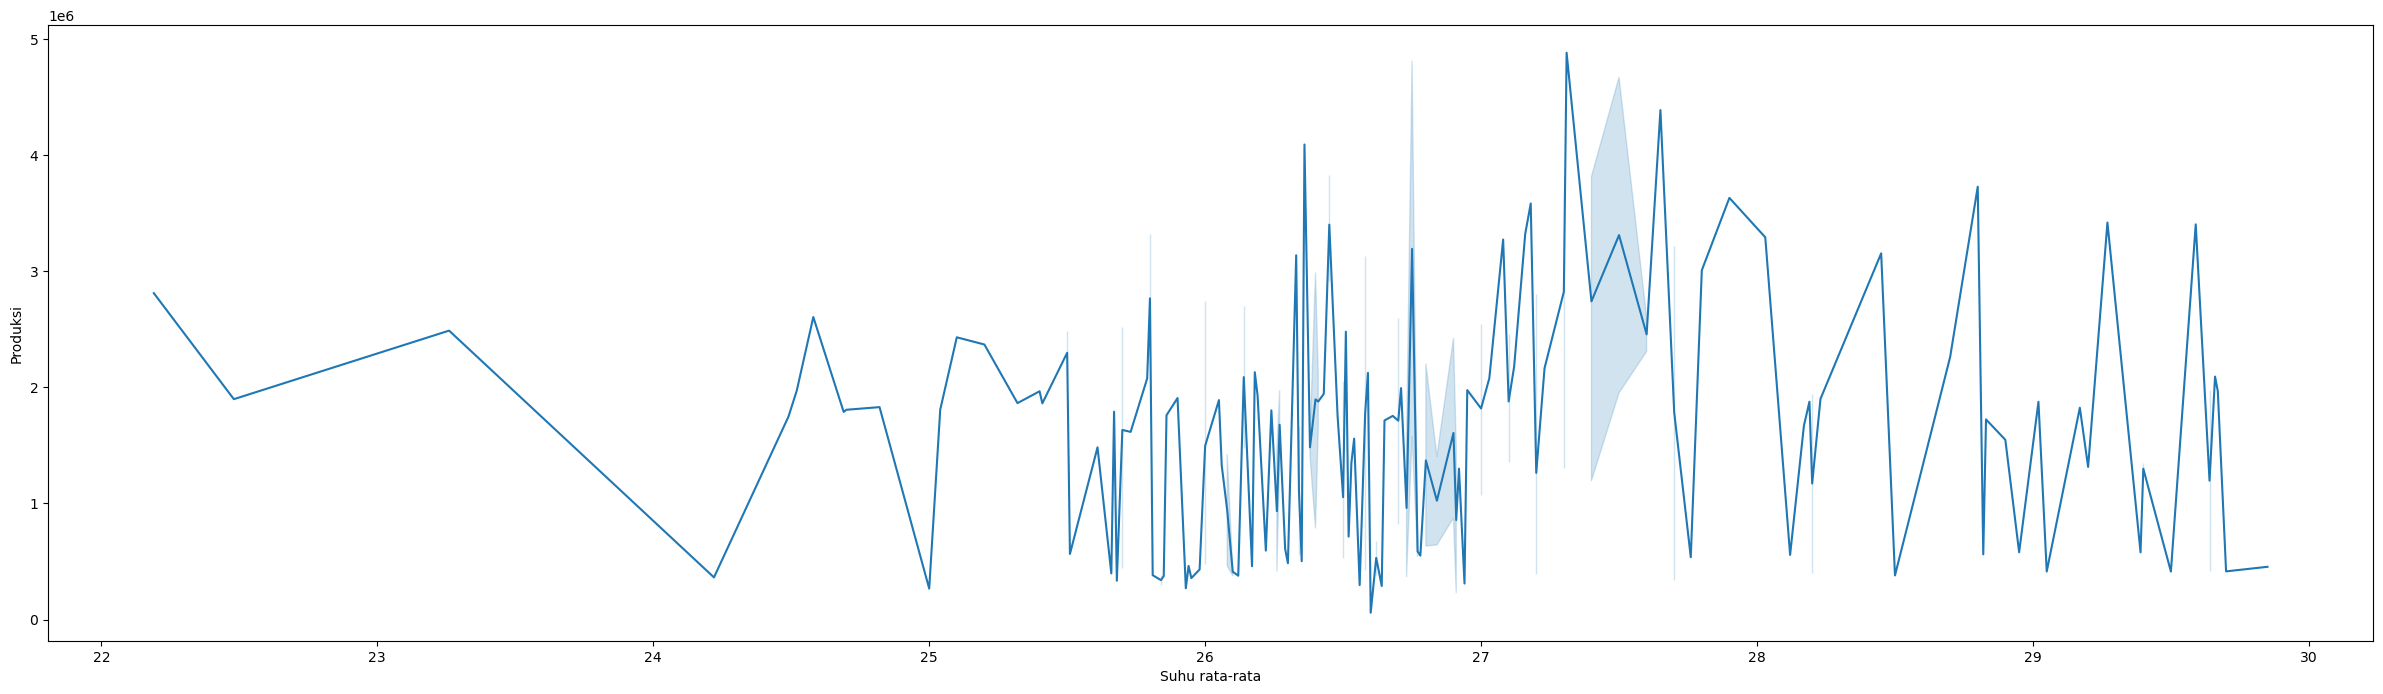

In [13]:
#Make a line plot of the relationship between average temperature and production
plt.figure(figsize=(30, 8))
sns.lineplot(x=df1['Suhu rata-rata'], y=df1['Produksi'])
plt.show()

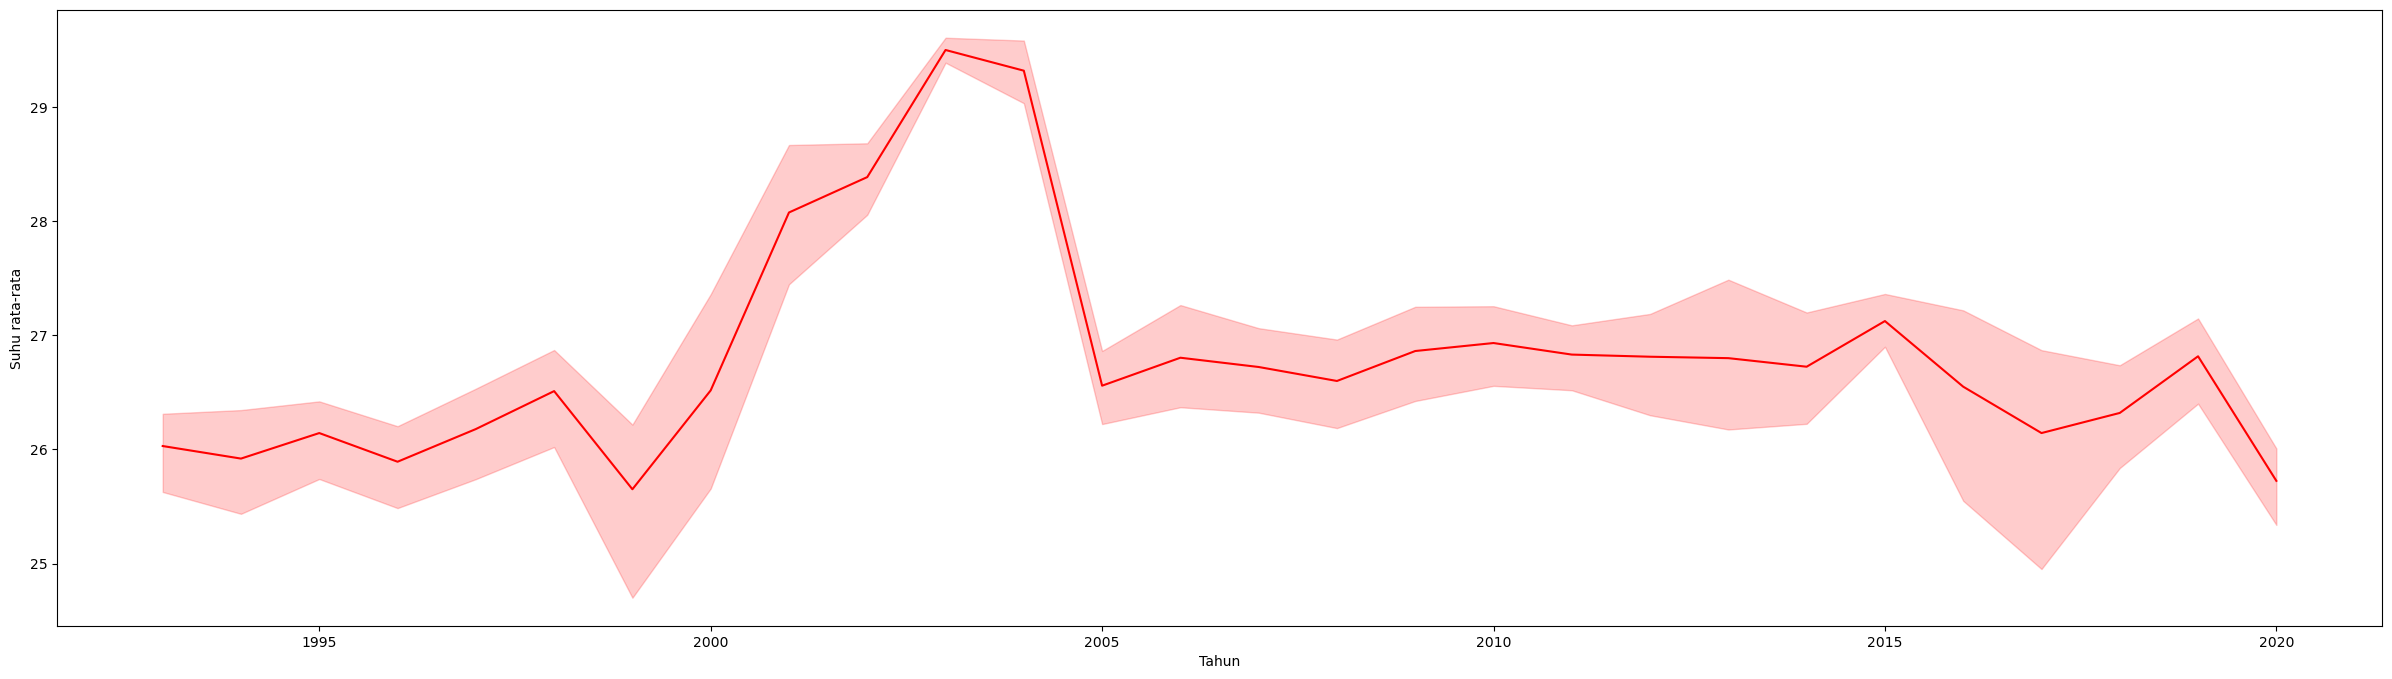

In [14]:
#Make a line plot of the relationship between year and average temperature
plt.figure(figsize=(30, 8))
sns.lineplot(x=df1['Tahun'], y=df1['Suhu rata-rata'], color='red')
plt.show()

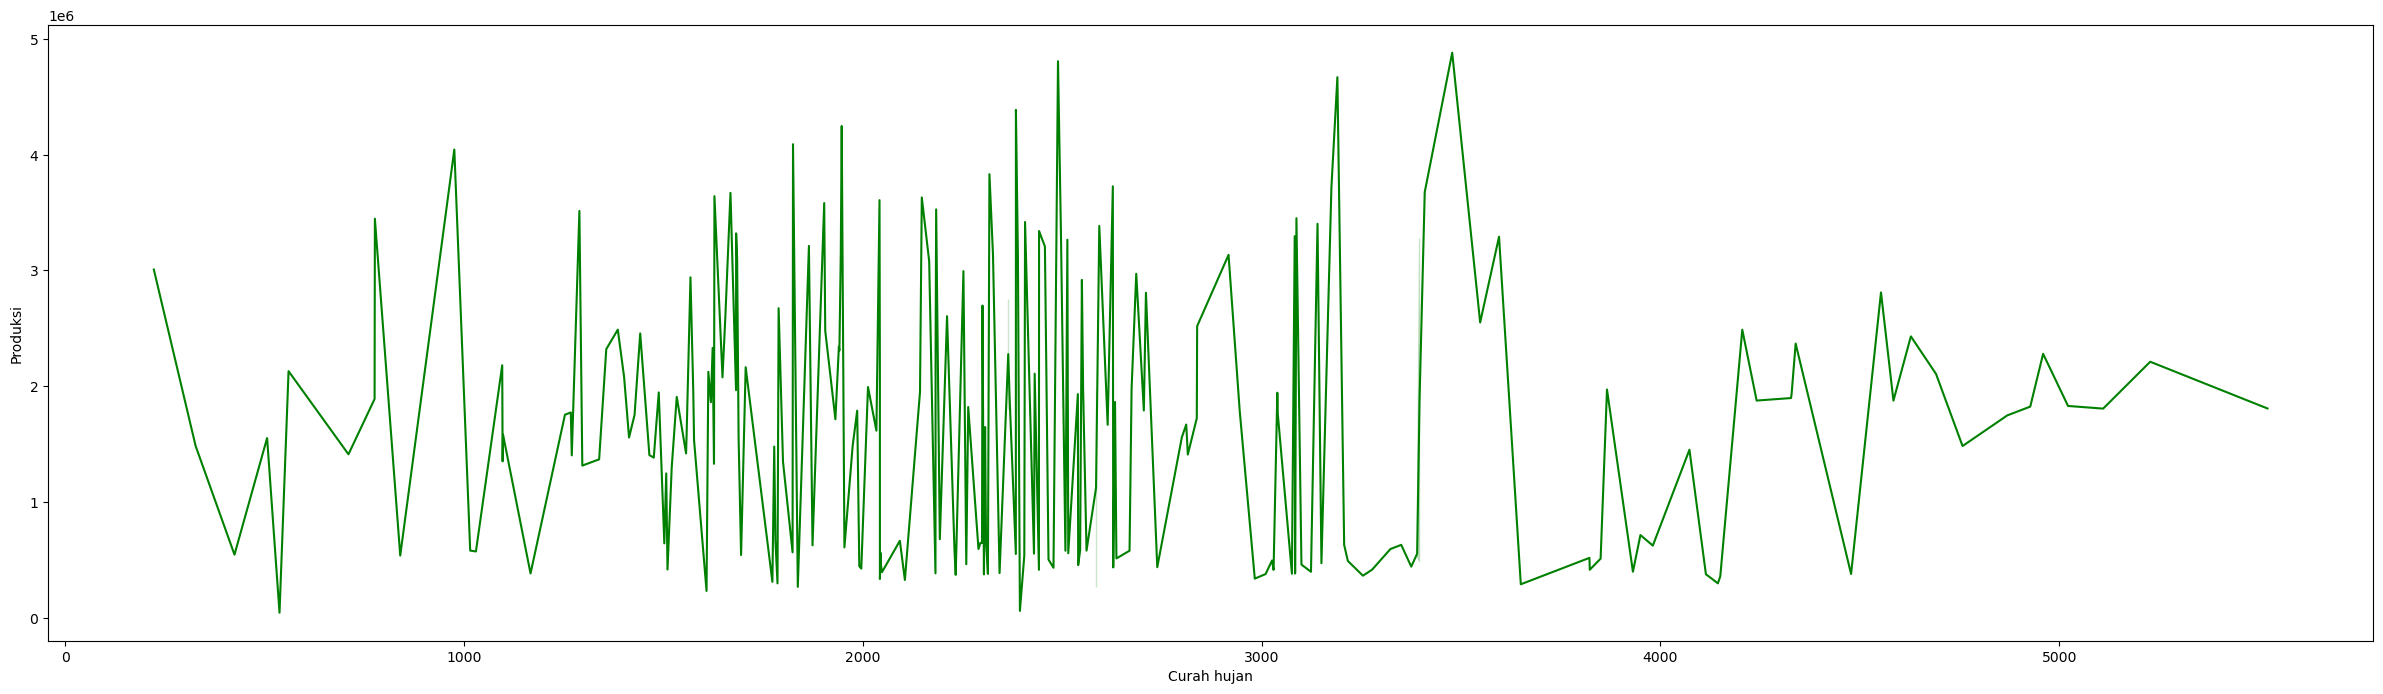

In [15]:
#Create a line plot of the relationship between Rainfall and Production
plt.figure(figsize=(30, 8))
sns.lineplot(x=df1['Curah hujan'], y=df1['Produksi'], color='green')
plt.show()

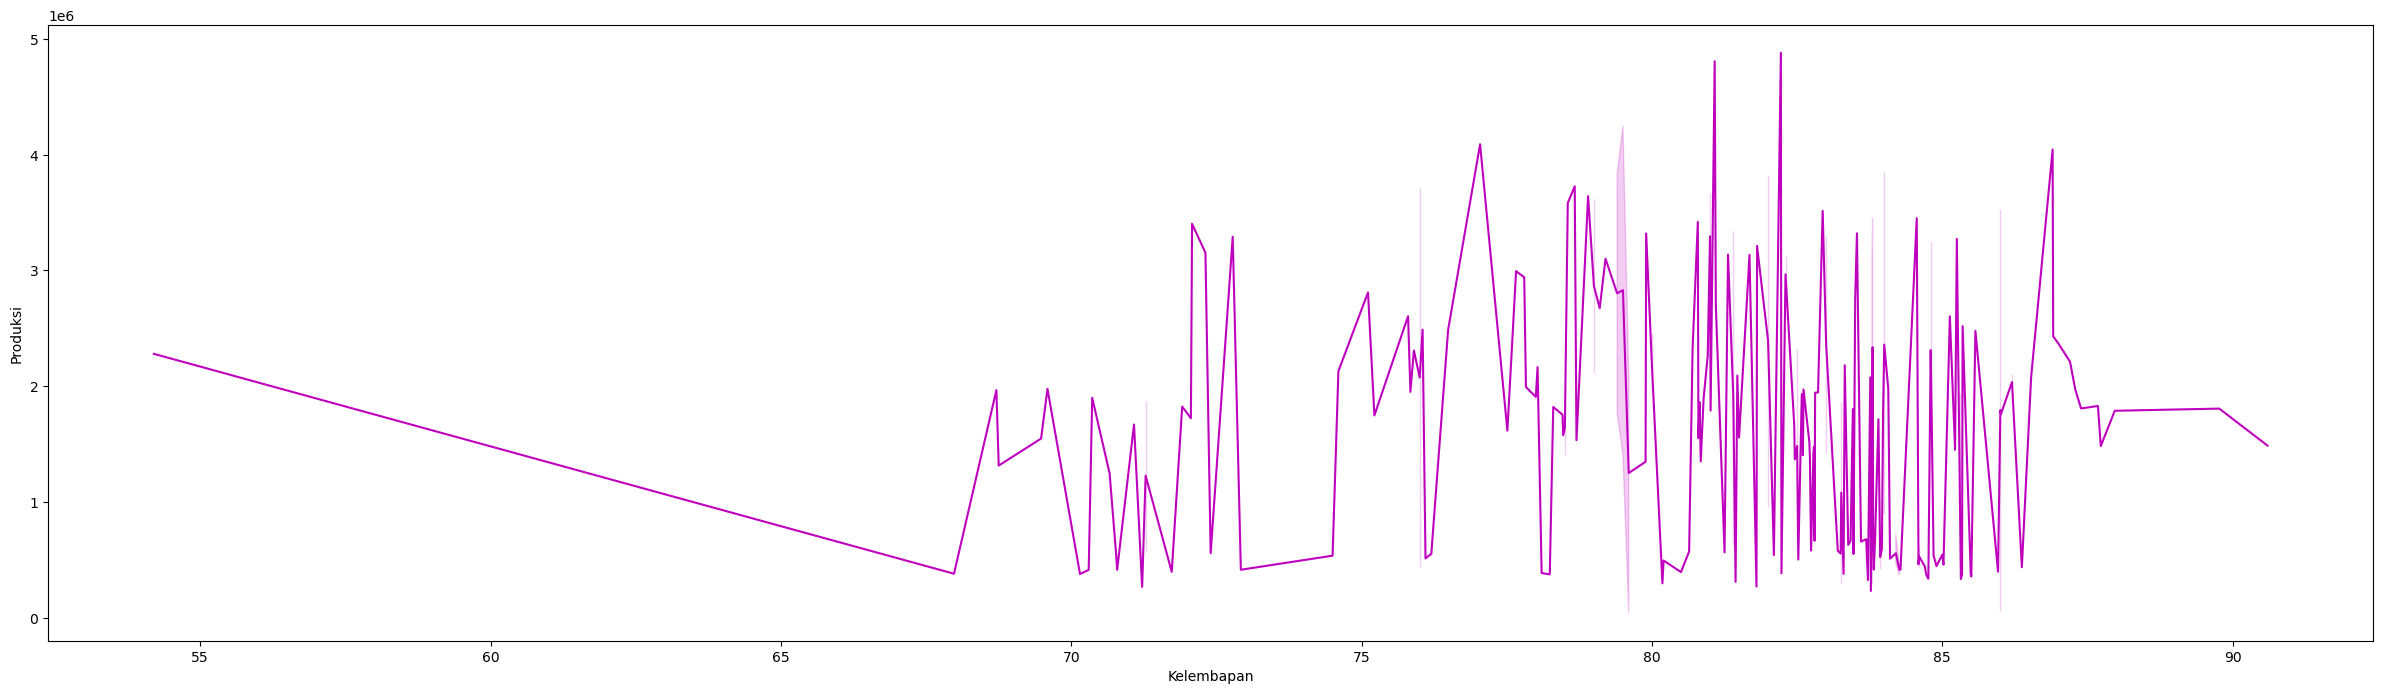

In [16]:
#Create a line plot of the relationship between Humidity and Production
plt.figure(figsize=(30,8))
sns.lineplot(x=df1['Kelembapan'],y=df1['Produksi'], color='m')
plt.show()

### a. Distribution of production quantities

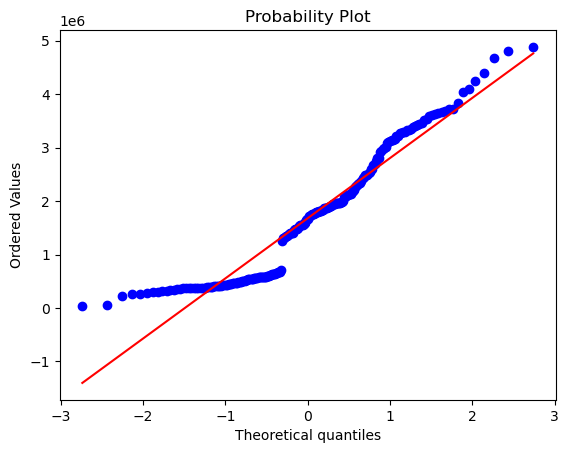

In [17]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(df1['Produksi'], dist='norm', plot=py)
py.show()

### b. Checking the Outlier

<AxesSubplot:>

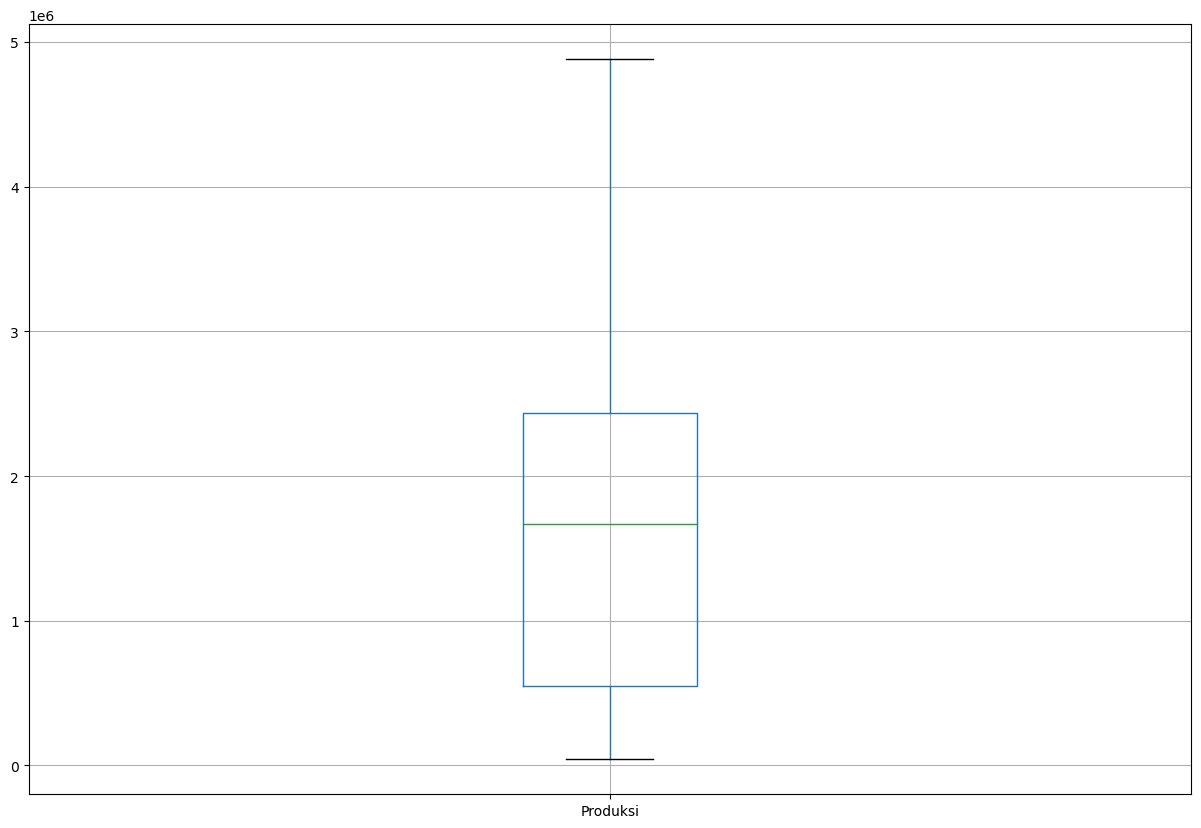

In [18]:
#Create a box plot to check outliers
df1[['Produksi']].boxplot(figsize=(15,10))

### c. Correlation Matrix Between Numerical Variables

In [19]:
#Accessing a list of columns from a dataframe
df1.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [20]:
#change the column order
cols = list(df1.columns)

df = df1.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


In [21]:
#Calculates the correlation matrix between numeric columns
df.corr()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


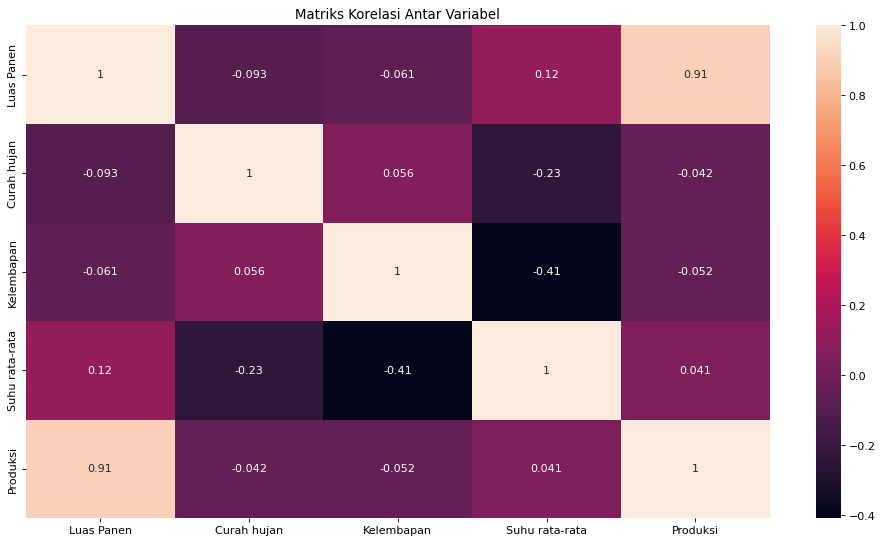

In [22]:
#Create Heatmap
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

## Data Preprocessing (Feature Engineering)

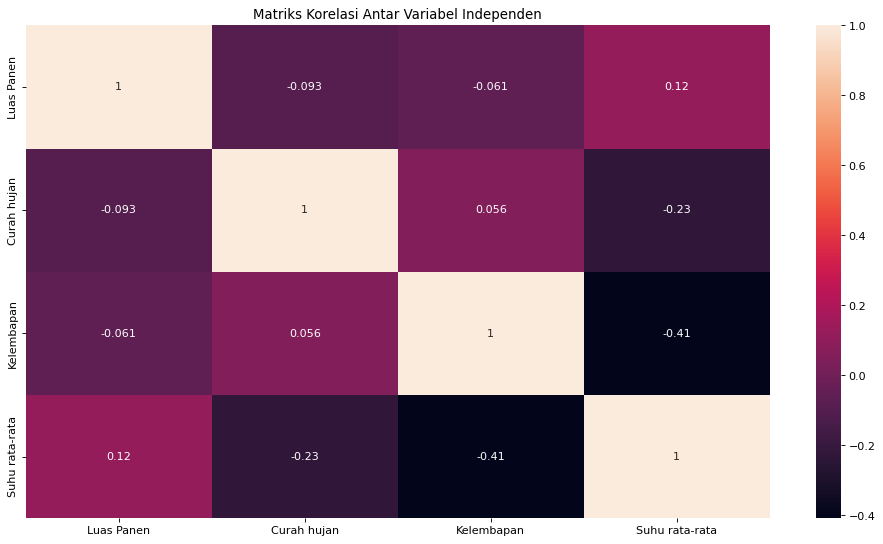

In [23]:
#checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(), cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar Variabel Independen')
plt.show()

## Feature Encoding

In [24]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [25]:
#Removes the column with the name 'Year' from the DataFrame
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
#Retrieves feature data from the DataFrame and removes the 'Production' column from the DataFrame
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

## Train and Test Split

In [27]:
#Divide the data into a training set and a test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [28]:
#Takes the first five rows of the training set
x_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
#Displays the last five rows of the test set
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


## Feature Scaling

In [30]:
#Perform feature scaling on training and testing data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [31]:
#Takes the first five rows of the training set
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01,  2.76887462e+00, -4.05190208e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01,  2.46797672e+00],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03,  2.76887462e+00, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00, -3.61157559e-01, -4.05190208e-01,
         2.60768096e+00, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-1.05176751e+00, -2.70812770e-01,  7.4046415

In [32]:
#Eliminates scientific or exponential notation when printing floating-point numbers
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [33]:
#Finds the minimum and maximum values in the x_train array
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [34]:
#Finds the minimum and maximum values in the y_train array
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [35]:
#Check how the model performs on new data.
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


## Modeling

### Linear Regression

In [36]:
#Create a linear regression model object and train a linear regression model using the training data
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [37]:
#Make predictions using a trained linear regression model
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))
#do the reverse to return to the original value (because it was previously standardized)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


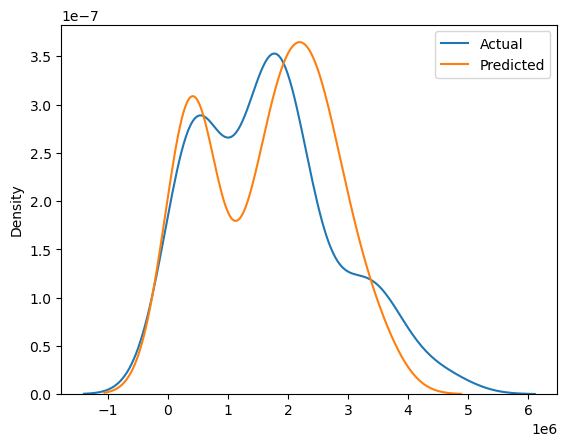

In [38]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [39]:
#Check the accuracy of testing and training of Linear Regression models
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assessing the performance of the Linear Regression method by randomly dividing the sample data 10 times
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('Rata-rata Skor Validasi Silang adalah',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524144 

Rata-rata Skor Validasi Silang adalah 82.9


## Hyperparameter Tuning

In [40]:
#View information about configurations or settings that have been applied to the model
LinReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [41]:
#Tuning the linear regression model using a technique called Grid Search Cross-Validation (GridSearchCV)
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11),
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
Best score is 0.8387472527255266


## Fit New Model

In [42]:
#Create a linear regression model and train (fit) the model with training data
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [43]:
#Make predictions with a pre-trained linear regression model
#Then return the prediction results to the original scale after previously standardizing (scaling) the data
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,4.556448e+05
64,2.049707e+06
65,2.917382e+06
66,1.980058e+06
67,1.487799e+06


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


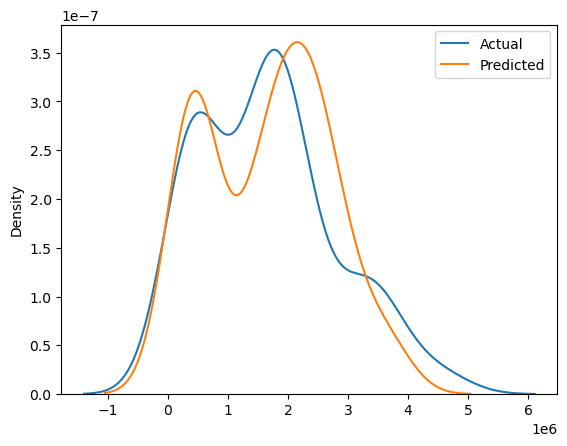

In [44]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [45]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  84.6508189494205
Test  :  86.89566591106708 

The Average Cross Validation Score is 83.0


### Random Forest Regression

In [46]:
#Create and train a Random Forest Regression model (RandomForestRegressor) with several predetermined hyperparameters
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [47]:
#Make predictions with a previously trained Random Forest Regression (RFReg) model
#Then return the prediction results to the original scale after previously standardizing (scaling) the data.
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.490402e+05
64,1.875380e+06
65,2.600398e+06
66,1.951832e+06
67,2.114010e+06


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


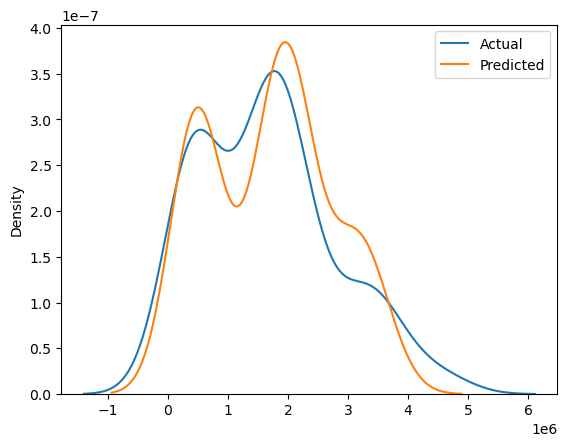

In [48]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [49]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_valida

Train :  95.23971349396201
Test  :  85.48007246824575 

The Average Cross Validation Score is 83.81


## Hyperparameter Tuning


In [50]:
#View information about configurations or settings that have been applied to the model
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [51]:
#Tuning the Random Forest Regression model (RandomForestRegressor) using the Randomized Search Cross-Validation (RandomizedSearchCV) technique
param_grid = {'bootstrap' : [True, False],
             'max_depth': np.arange(1,11),
             'min_samples_leaf': np.arange(1, 11),
             'min_samples_split': np.arange(2, 11),
             'n_estimators': np.arange(100, 501)}

RFReg_tuning = RandomForestRegressor()

RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', RFReg_best_model.best_params_)
print('Best score is {}'.format(RFReg_best_model.best_score_))

Optimum parameters {'n_estimators': 154, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 8, 'bootstrap': True}
Best score is 0.8389724214480301


## Fit New Model

In [52]:
#Create and train a Random Forest Regression model (RandomForestRegressor) with hyperparameter settings
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [53]:
#Make predictions with a previously trained Random Forest Regression model (RFReg_model).
#Then return the prediction results to the original scale after previously standardizing (scaling) the data
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.374426e+05
64,1.874739e+06
65,2.709860e+06
66,1.895373e+06
67,2.136797e+06


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


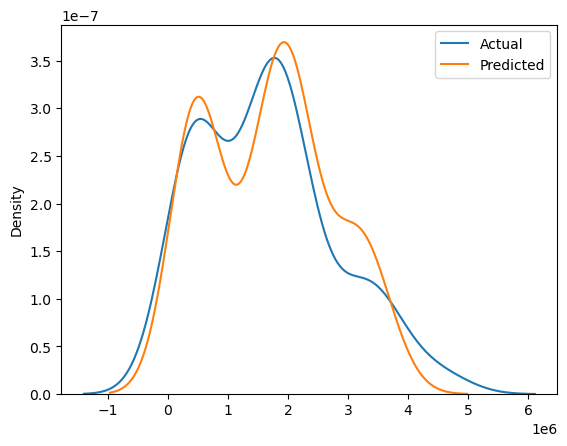

In [54]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [55]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100


#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  97.47517414251053
Test  :  86.37724010302279 

The Average Cross Validation Score is 83.0


## Model Evaluation

In [56]:
#Evaluate and compare the performance of two types of regression models, namely Linear Regression and Random Forest, using several evaluation metrics
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228729
Random Forest,86.377240,224668.555252,177505334097.156494
